In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm"
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
    "looseBarrelE_matched",
    "barrelE_matched",
    "looseEndcapE_matched",
    "endcapE_matched",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra", "base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel  looseEndcapE_matched
Not applying any cuts to the lepton jets for channel  endcapE_matched
Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel  looseEndcapE_matched
Not applying any cuts to the lepton jets for channel  endcapE_matched
Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  barrelE_matched
Not applying any cuts to the lepton jets for channel  looseEndcapE_matched
Not applying any cuts to the lepton jets for channel  endcapE_matched
Not applying any cuts to the lepton jets for channel  looseBarrelE_matched
Not applying any cuts to the lepton jets for channel  b

Plots compare four separate channels:

Channel0 only includes the electrons that have passed the loose ID (barrel only)

Channel1 includes all barrel electrons (but without any ID requirements applied)

Channel2 only includes the electrons that have passed the loose ID (endcap only)

Channel3 includes all endcap electrons (but without any ID requirements applied)

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed. Comparing Barrel and EndCap electrons with Channel0 and Channel1

Text(0, 1, 'Number of Events')

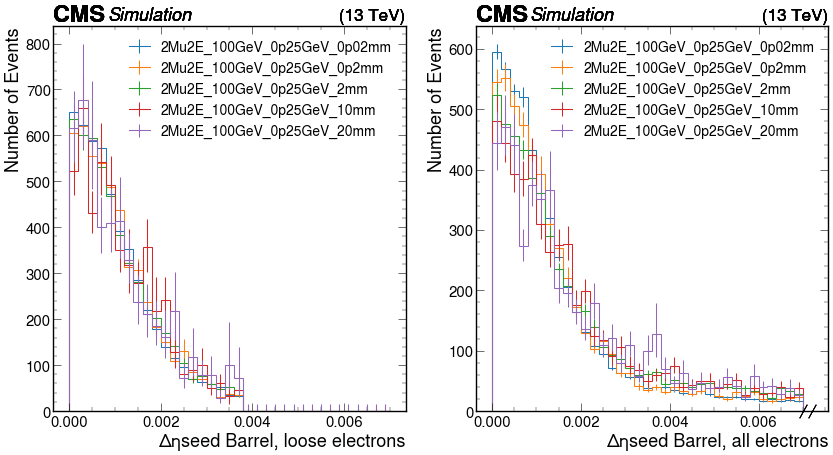

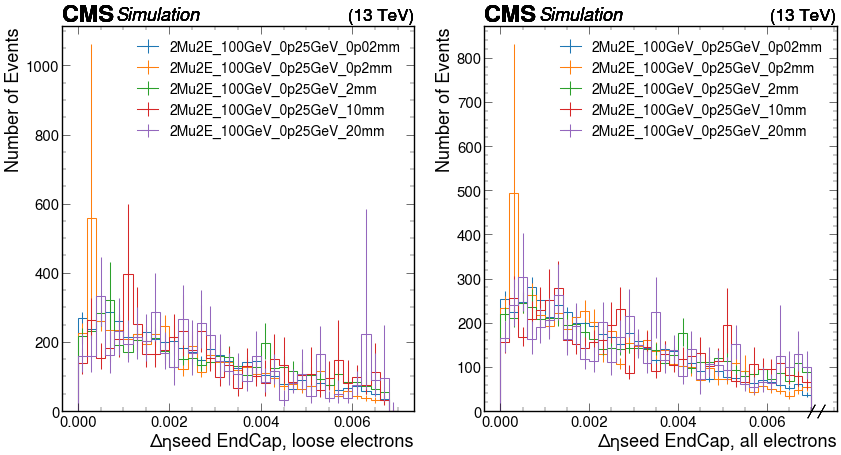

In [3]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed Barrel, all electrons")
plt.ylabel("Number of Events")

plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[2], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDEtaInSeedCut"][channels[3], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δηseed EndCap, all electrons")
plt.ylabel("Number of Events")

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

Text(0, 1, 'Number of Events')

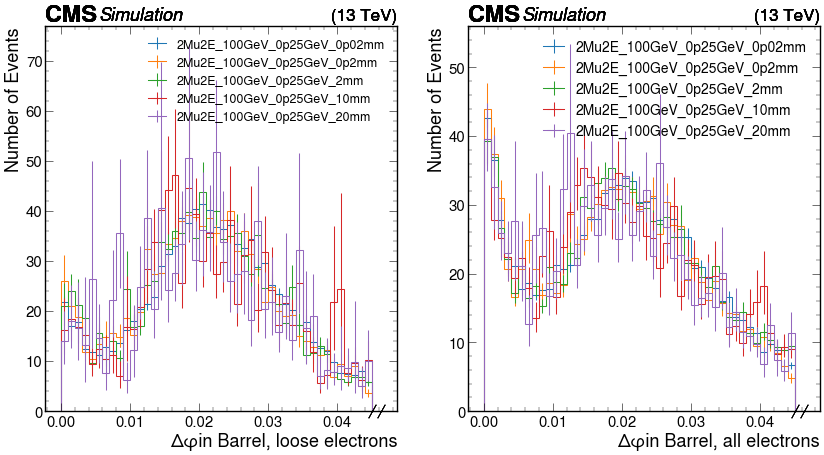

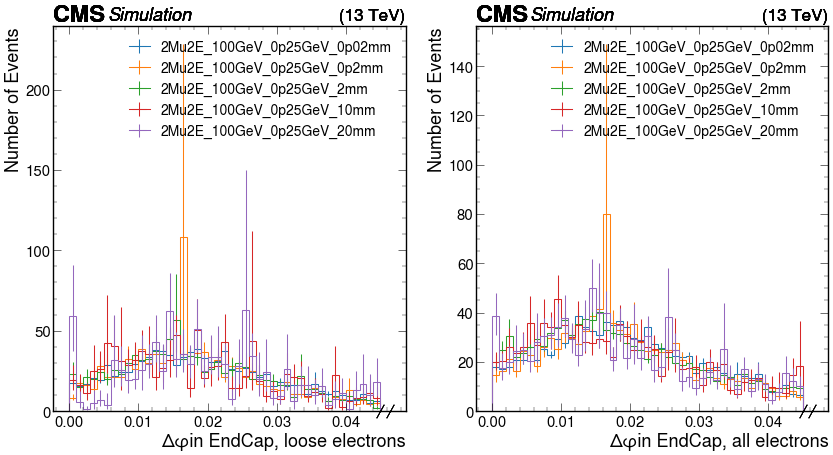

In [4]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 18})
plt.xlabel("Δφin Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δφin Barrel, all electrons")
plt.ylabel("Number of Events")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[2], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δφin EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleDPhiInCut"][channels[3], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Δφin EndCap, all electrons")
plt.ylabel("Number of Events")

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.


In [5]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p Barrel, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10today))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[2], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleEInverseMinusPInverseCut"][channels[3], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("1/E − 1/p EndCap, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")


SyntaxError: invalid syntax (4083926892.py, line 19)

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

In [ ]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[0], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[1], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation Barrel, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[2], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleRelPFIsoScaledCut"][channels[3], :], label = sample, density = True)
plt.legend(prop={'size': 20})
plt.xlabel("Isolation EndCap, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

In [ ]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 18})
plt.xlabel("σiηiη Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 18})
plt.xlabel("σiηiη Barrel, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[2], :], label = sample, density = True)
plt.legend(loc="upper left", prop={'size': 20})
plt.xlabel("σiηiη EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleFull5x5SigmaIEtaIEtaCut"][channels[3], :], label = sample, density = True)
plt.legend(loc="lower right", prop={'size': 16})
plt.xlabel("σiηiη EndCap, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

In [ ]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="lower left", prop={'size': 18})
plt.xlabel("Conversion veto Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper left", prop={'size': 18})
plt.xlabel("Conversion veto Barrel, all electrons")
plt.ylabel("Number of Events")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[2], :], label = sample, density = True)
plt.legend(loc="lower left", prop={'size': 18})
plt.xlabel("Conversion veto EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleConversionVetoCut"][channels[3], :], label = sample, density = True)
plt.legend(loc="upper left", prop={'size': 18})
plt.xlabel("Conversion veto EndCap, all electrons")
plt.ylabel("Number of Events")

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

In [ ]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 23})
plt.xlabel("H/E Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 24})
plt.xlabel("H/E Barrel, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[2], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 23})
plt.xlabel("H/E EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.yscale("log")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleHadronicOverEMEnergyScaledCut"][channels[3], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 24})
plt.xlabel("H/E EndCap, all electrons")
plt.ylabel("Number of Events")
plt.yscale("log")

# Expected missing inner hits:

number of missing hits expected for GSF track.

In [ ]:
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[0], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits Barrel, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[1], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits Barrel, all electrons")
plt.ylabel("Number of Events")

for sample in samples:
    hists = out[sample]["hists"]
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[2], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits EndCap, loose electrons")
plt.ylabel("Number of Events")
plt.subplot(1, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["electron_GsfEleMissingHitsCut"][channels[3], :], label = sample, density = True)
plt.legend(loc="upper right", prop={'size': 22})
plt.xlabel("Expected Missing Inner Hits EndCap, all electrons")
plt.ylabel("Number of Events")